<center> <img src = https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/hh%20label.jpg alt="drawing" style="width:400px;">

# <center> Проект: Анализ резюме из HeadHunter


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import re

# Исследование структуры данных

1. Прочитайте данные с помощью библиотеки Pandas. Совет: перед чтением обратите внимание на разделитель внутри файла.

In [2]:
# Читаем данные из CSV-файла с разделителем ";"
df = pd.read_csv("dst-3.0_16_1_hh_database.csv", sep=";")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


2. Выведите несколько первых (последних) строк таблицы, чтобы убедиться в том, что ваши данные не повреждены. Ознакомьтесь с признаками и их структурой.

In [3]:
# Выводим первые 5 строк таблицы
df.head()

,"Пол, возраст",ЗП,Ищет работу на должность:,"Город, переезд, командировки",Занятость,График,Опыт работы,Последнее/нынешнее место работы,Последняя/нынешняя должность,Образование и ВУЗ,Обновление резюме,Авто
0,"Мужчина , 39 лет , родился 27 ноября 1979",29000 руб.,Системный администратор,"Советск (Калининградская область) , не готов к...","частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, ва...",Опыт работы 16 лет 10 месяцев Август 2010 — п...,"МАОУ ""СОШ № 1 г.Немана""",Системный администратор,Неоконченное высшее образование 2000 Балтийск...,16.04.2019 15:59,Имеется собственный автомобиль
1,"Мужчина , 60 лет , родился 20 марта 1959",40000 руб.,Технический писатель,"Королев , не готов к переезду , готов к редким...","частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, уд...",Опыт работы 19 лет 5 месяцев Январь 2000 — по...,Временный трудовой коллектив,"Менеджер проекта, Аналитик, Технический писатель",Высшее образование 1981 Военно-космическая ак...,12.04.2019 08:42,Не указано
2,"Женщина , 36 лет , родилась 12 августа 1982",20000 руб.,Оператор,"Тверь , не готова к переезду , не готова к ком...",полная занятость,полный день,Опыт работы 10 лет 3 месяца Октябрь 2004 — Де...,ПАО Сбербанк,Кассир-операционист,Среднее специальное образование 2002 Профессио...,16.04.2019 08:35,Не указано
3,"Мужчина , 38 лет , родился 25 июня 1980",100000 руб.,Веб-разработчик (HTML / CSS / JS / PHP / базы ...,"Саратов , не готов к переезду , готов к редким...","частичная занятость, проектная работа, полная ...","гибкий график, удаленная работа",Опыт работы 18 лет 9 месяцев Август 2017 — Ап...,OpenSoft,Инженер-программист,Высшее образование 2002 Саратовский государст...,08.04.2019 14:23,Не указано
4,"Женщина , 26 лет , родилась 3 марта 1993",140000 руб.,Региональный менеджер по продажам,"Москва , не готова к переезду , готова к коман...",полная занятость,полный день,Опыт работы 5 лет 7 месяцев Региональный мене...,Мармелад,Менеджер по продажам,Высшее образование 2015 Кгу Психологии и педаг...,22.04.2019 10:32,Не указано


3. Выведите основную информацию о числе непустых значений в столбцах и их типах в таблице.

In [4]:
# Выводим информацию о структуре данных
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44744 entries, 0 to 44743
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Пол, возраст                     44744 non-null  object
 1   ЗП                               44744 non-null  object
 2   Ищет работу на должность:        44744 non-null  object
 3   Город, переезд, командировки     44744 non-null  object
 4   Занятость                        44744 non-null  object
 5   График                           44744 non-null  object
 6   Опыт работы                      44576 non-null  object
 7   Последнее/нынешнее место работы  44743 non-null  object
 8   Последняя/нынешняя должность     44742 non-null  object
 9   Образование и ВУЗ                44744 non-null  object
 10  Обновление резюме                44744 non-null  object
 11  Авто                             44744 non-null  object
dtypes: object(12)
memory usage: 4.1+

4. Обратите внимание на информацию о числе непустых значений.

In [5]:
# Подсчитываем количество пропущенных значений (NaN) в каждом столбце DataFrame 'df'
null_counts = df.isnull().sum()

# Фильтруем результат, оставляя только столбцы с хотя бы одним пропущенным значением
columns_with_nulls = null_counts[null_counts > 0]

# Выводим заголовок для более читабельного результата
print("Количество пустых значений в столбцах с пропусками:\n")

# Цикл по столбцам с пропусками.  'items()' возвращает пары (название столбца, количество пропущенных значений)
for column, count in columns_with_nulls.items():
    # Выводим название столбца и количество пропущенных значений в нём
    print(f"Столбец '{column}': {count} пустых значений")

Количество пустых значений в столбцах с пропусками:

Столбец 'Опыт работы': 168 пустых значений
Столбец 'Последнее/нынешнее место работы': 1 пустых значений
Столбец 'Последняя/нынешняя должность': 2 пустых значений


5. Выведите основную статистическую информацию о столбцах.


In [6]:
# Выведем основную статистическую информацию
df.describe()

,"Пол, возраст",ЗП,Ищет работу на должность:,"Город, переезд, командировки",Занятость,График,Опыт работы,Последнее/нынешнее место работы,Последняя/нынешняя должность,Образование и ВУЗ,Обновление резюме,Авто
count,44744,44744,44744,44744,44744,44744,44576,44743,44742,44744,44744,44744
unique,16003,690,14929,10063,38,47,44413,30214,16927,40148,18838,2
top,"Мужчина , 32 года , родился 17 сентября 1986",50000 руб.,Системный администратор,"Москва , не готов к переезду , не готов к кома...",полная занятость,полный день,Опыт работы 10 лет 8 месяцев Апрель 2018 — по...,Индивидуальное предпринимательство / частная п...,Системный администратор,Высшее образование 1987 Военный инженерный Кра...,07.05.2019 09:50,Не указано
freq,18,4064,3099,1261,30026,22727,3,935,2062,4,25,32268


Данные успешно считаны из файла. Были проверены первые и последние 5 строк на наличие видимых повреждений или несоответствий. Структура данных включает в себя следующие поля:
* `Пол`;
*`возраст`;
*`ЗП`;
*`желаемая должность`;
*`город`;
*`готовность к переезду и командировкам`;
*`тип занятости`;
*`график работы`;
*`опыт работы`;
*`предыдущее место работы`;
*`предыдущая должность`;
*`образование и ВУЗ`;
*`дата обновления резюме`;
*`наличие автомобиля`.

 В таблице содержится 44744 записи. Наиболее распространённая зарплата составляет 50000 руб. Наиболее часто встречающаяся должность – Системный администратор. Наиболее распространенным городом является Москва. Обнаружены пропущенные значения в столбцах `'Опыт работы'` (168), `'Последнее/нынешнее место работы'`(1) и `'Последняя/нынешняя должность'`(2). Это следует учесть при дальнейшем анализе данных.

# Преобразование данных

1. Начнем с простого - с признака **"Образование и ВУЗ"**. Его текущий формат это: **<Уровень образования год выпуска ВУЗ специальность...>**. Например:
* Высшее образование 2016 Московский авиационный институт (национальный исследовательский университет)...
* Неоконченное высшее образование 2000 Балтийская государственная академия рыбопромыслового флота…
Нас будет интересовать только уровень образования.

Создайте с помощью функции-преобразования новый признак **"Образование"**, который должен иметь 4 категории: "высшее", "неоконченное высшее", "среднее специальное" и "среднее".

Выполните преобразование, ответьте на контрольные вопросы и удалите признак "Образование и ВУЗ".

Совет: обратите внимание на структуру текста в столбце **"Образование и ВУЗ"**. Гарантируется, что текущий уровень образования соискателя всегда находится в первых 2ух слов и начинается с заглавной буквы. Воспользуйтесь этим.

*Совет: проверяйте полученные категории, например, с помощью метода unique()*


In [7]:
def extract_education_level(text):
 """
 Извлекает уровень образования из текста. Функция предполагает, что уровень образования указан в первых двух словах текста.
 Например: "Высшее образование", "Неоконченное высшее", "Среднее специальное", "Среднее образование".
 """
 parts = text.split() # Разбиваем текст на слова
 if len(parts) >= 2: # Проверяем, достаточно ли слов в тексте
  education = parts[0] + " " + parts[1] # Объединяем первые два слова
  if education.startswith("Высшее"): # Проверяем, начинается ли строка с "Высшее"
   return "высшее"
  elif education.startswith("Неоконченное высшее"): # Проверяем, начинается ли строка с "Неоконченное высшее"
   return "неоконченное высшее"
  elif education.startswith("Среднее специальное"): # Проверяем, начинается ли строка с "Среднее специальное"
   return "среднее специальное"
  elif education.startswith("Среднее"): # Проверяем, начинается ли строка с "Среднее"
   return "среднее"
 return None # Возвращаем None, если формат не соответствует ожидаемому или слов меньше двух

# Создаем новый признак "Образование"
df['Образование'] = df['Образование и ВУЗ'].apply(extract_education_level)

# Проверка на уникальные значения:
print("Уникальные значения в новом столбце 'Образование':\n", df['Образование'].unique())

# Проверка на пропущенные значения в новом столбце:
missing_education = df['Образование'].isnull().sum()
print(f"\nКоличество пропущенных значений в столбце 'Образование': {missing_education}")

# Удаляем исходный столбец
df = df.drop(columns=['Образование и ВУЗ'])

#Проверяем что столбец удален
print("\nСтолбцы после удаления 'Образование и ВУЗ':", df.columns)

Уникальные значения в новом столбце 'Образование':
 ['неоконченное высшее' 'высшее' 'среднее специальное' 'среднее']

Количество пропущенных значений в столбце 'Образование': 0

Столбцы после удаления 'Образование и ВУЗ': Index(['Пол, возраст', 'ЗП', 'Ищет работу на должность:',
       'Город, переезд, командировки', 'Занятость', 'График', 'Опыт работы',
       'Последнее/нынешнее место работы', 'Последняя/нынешняя должность',
       'Обновление резюме', 'Авто', 'Образование'],
      dtype='object')


2. Теперь нас интересует столбец **"Пол, возраст"**. Сейчас он представлен в формате **<Пол , возраст , дата рождения >**. Например:
* Мужчина , 39 лет , родился 27 ноября 1979
* Женщина , 21 год , родилась 13 января 2000
Как вы понимаете, нам необходимо выделить каждый параметр в отдельный столбец.

Создайте два новых признака **"Пол"** и **"Возраст"**. При этом важно учесть:
* Признак пола должен иметь 2 уникальных строковых значения: 'М' - мужчина, 'Ж' - женщина.
* Признак возраста должен быть представлен целыми числами.

Выполните преобразование, ответьте на контрольные вопросы и удалите признак **"Пол, возраст"** из таблицы.

*Совет: обратите внимание на структуру текста в столбце, в части на то, как разделены параметры пола, возраста и даты рождения между собой - символом ' , '.
Гарантируется, что структура одинакова для всех строк в таблице. Вы можете воспользоваться этим.*


In [8]:
def extract_gender_and_age(text):
    """
    Извлекает пол и возраст из текста. Функция предполагает, что текст имеет формат "Пол, Возраст",
    например: "Мужчина, 35 лет", "Женщина, 22 года".
    Возвращает кортеж (код пола, возраст), где код пола - 'М' для мужчины, 'Ж' для женщины, None - если пол неизвестен.
    Возраст - целое число или None, если его извлечь не удалось.
    """
    # Убираем лишние пробелы и запятые
    text = text.replace(' ,', ',').replace(', ', ',') # Удаляем лишние пробелы вокруг запятых
    parts = text.split(',') # Разделяем строку на части по запятой

    if len(parts) >= 2: # Проверяем, есть ли хотя бы пол и возраст
        gender = parts[0].strip() # Извлекаем пол и убираем лишние пробелы
        age_part = parts[1].strip() # Извлекаем часть со значением возраста и убираем лишние пробелы

        # Определяем код пола
        if gender == "Мужчина":
            gender_code = 'М'
        elif gender == "Женщина":
            gender_code = 'Ж'
        else:
            gender_code = None

        # Извлекаем возраст с помощью регулярного выражения
        match = re.search(r'(\d+)', age_part) # Ищем последовательность из одной или более цифр
        if match:
            age = int(match.group(1)) # Преобразуем найденное число в целое
        else:
            age = None

        return gender_code, age # Возвращаем код пола и возраст

    return None, None # Возвращаем None, None если формат строки не соответствует ожидаемому

# Создаем новые столбцы "Пол" и "Возраст"
df['Пол'], df['Возраст'] = zip(*df['Пол, возраст'].apply(extract_gender_and_age))

# Удаляем исходный столбц 'Пол и 'возраст'
df = df.drop(columns=['Пол, возраст'])

# Проверка на пропущенные значения в новом столбце:
missing_gender = df['Пол'].isnull().sum()
print(f"Количество пропущенных значений в столбце 'Пол': {missing_gender}\n")

# Проверка на пропущенные значения в новом столбце 'Возраст':
missing_age = df['Возраст'].isnull().sum()
print(f"Количество пропущенных значений в столбце 'Возраст': {missing_age}\n")

#Проверяем что столбец удален
print("\nСтолбцы после удаления 'Возраст':", df.columns)

Количество пропущенных значений в столбце 'Пол': 0

Количество пропущенных значений в столбце 'Возраст': 0


Столбцы после удаления 'Возраст': Index(['ЗП', 'Ищет работу на должность:', 'Город, переезд, командировки',
       'Занятость', 'График', 'Опыт работы', 'Последнее/нынешнее место работы',
       'Последняя/нынешняя должность', 'Обновление резюме', 'Авто',
       'Образование', 'Пол', 'Возраст'],
      dtype='object')


3. Следующим этапом преобразуем признак **"Опыт работы"**. Его текущий формат - это: **<Опыт работы: n лет m месяцев, периоды работы в различных компаниях…>**.

Из столбца нам необходимо выделить общий опыт работы соискателя в месяцах, новый признак назовем "Опыт работы (месяц)"

Для начала обсудим условия решения задачи:
* Во-первых, в данном признаке есть пропуски. Условимся, что если мы встречаем пропуск, оставляем его как есть (функция-преобразование возвращает NaN)
* Во-вторых, в данном признаке есть скрытые пропуски. Для некоторых соискателей в столбце стоит значения "Не указано". Их тоже обозначим как NaN (функция-преобразование возвращает NaN)
* В-третьих, нас не интересует информация, которая описывается после указания опыта работы (периоды работы в различных компаниях)
* В-четвертых, у нас есть проблема: опыт работы может быть представлен только в годах или только месяцах. Например, можно встретить следующие варианты:
 * Опыт работы 3 года 2 месяца…
 * Опыт работы 4 года…
 * Опыт работы 11 месяцев…
 * Учитывайте эту особенность в вашем коде

Учитывайте эту особенность в вашем коде

В результате преобразования у вас должен получиться столбец, содержащий информацию о том, сколько месяцев проработал соискатель.
Выполните преобразование, ответьте на контрольные вопросы и удалите столбец **"Опыт работы"** из таблицы.


In [9]:
def get_experience(arg):
    """
    Извлекает опыт работы в месяцах из строки.
    Возвращает количество месяцев опыта (число) или np.nan, если опыт не указан или формат некорректен.
    """

    # Проверяем на NaN или "не указано"
    if pd.isna(arg) or arg.lower() == 'не указано':
        return np.nan

    # Инициализируем переменные для лет и месяцев
    years = 0
    months = 0

    # Используем регулярные выражения для поиска чисел, связанных с годами и месяцами
    year_match = re.search(r'(\d+)\s*(год|года|лет)', arg)
    if year_match:
        years = int(year_match.group(1))

    month_match = re.search(r'(\d+)\s*(месяц|месяца|месяцев)', arg)
    if month_match:
        months = int(month_match.group(1))

    # Возвращаем общий опыт в месяцах
    return years * 12 + months

# Применяем функцию к столбцу 'Опыт работы'
df['Опыт работы (месяц)'] = df['Опыт работы'].apply(get_experience)

# # Удаляем исходный столбец 'Опыт работы'
df = df.drop(columns=['Опыт работы'])

# Проверка на пропущенные значения в новом столбце 'Опыт работы (месяц)':
missing_experiens = df['Возраст'].isnull().sum()
print(f"Количество пропущенных значений в столбце 'Опыт работы (месяц)': {missing_experiens}\n")

#Проверяем что столбец удален
print("\nСтолбцы после удаления 'Опыт работы':", df.columns)

Количество пропущенных значений в столбце 'Опыт работы (месяц)': 0


Столбцы после удаления 'Опыт работы': Index(['ЗП', 'Ищет работу на должность:', 'Город, переезд, командировки',
       'Занятость', 'График', 'Последнее/нынешнее место работы',
       'Последняя/нынешняя должность', 'Обновление резюме', 'Авто',
       'Образование', 'Пол', 'Возраст', 'Опыт работы (месяц)'],
      dtype='object')


4. Хорошо идем! Следующий на очереди признак "Город, переезд, командировки". Информация в нем представлена в следующем виде: **<Город , (метро) , готовность к переезду (города для переезда) , готовность к командировкам>**. В скобках указаны необязательные параметры строки. Например, можно встретить следующие варианты:

* Москва , не готов к переезду , готов к командировкам
* Москва , м. Беломорская , не готов к переезду, не готов к командировкам
* Воронеж , готов к переезду (Сочи, Москва, Санкт-Петербург) , готов к командировкам

Создадим отдельные признаки **"Город"**, **"Готовность к переезду"**, **"Готовность к командировкам"**. При этом важно учесть:

* Признак **"Город"** должен содержать только 4 категории: "Москва", "Санкт-Петербург" и "город-миллионник" (их список ниже), остальные обозначьте как "другие".

 Список городов-миллионников:

 <code>million_cities = ['Новосибирск', 'Екатеринбург','Нижний Новгород','Казань', 'Челябинск','Омск', 'Самара', 'Ростов-на-Дону', 'Уфа', 'Красноярск', 'Пермь', 'Воронеж','Волгоград']
 </code>
 Инфорация о метро, рядом с которым проживает соискатель нас не интересует.
* Признак **"Готовность к переезду"** должен иметь два возможных варианта: True или False. Обратите внимание, что возможны несколько вариантов описания готовности к переезду в признаке "Город, переезд, командировки". Например:
 * … , готов к переезду , …
 * … , не готова к переезду , …
 * … , готова к переезду (Москва, Санкт-Петербург, Ростов-на-Дону)
 * … , хочу переехать (США) , …

 Нас интересует только сам факт возможности или желания переезда.
* Признак **"Готовность к командировкам"** должен иметь два возможных варианта: True или False. Обратите внимание, что возможны несколько вариантов описания готовности к командировкам в признаке "Город, переезд, командировки". Например:
 * … , готов к командировкам , …
 * … , готова к редким командировкам , …
 * … , не готов к командировкам , …

 Нас интересует только сам факт готовности к командировке.

 Еще один важный факт: при выгрузки данных у некоторых соискателей "потерялась" информация о готовности к командировкам. Давайте по умолчанию будем считать, что такие соискатели не готовы к командировкам.

Выполните преобразования и удалите столбец **"Город, переезд, командировки"** из таблицы.

*Совет: обратите внимание на то, что структура текста может меняться в зависимости от указания ближайшего метро. Учите это, если будете использовать порядок слов в своей программе.*


In [10]:
# Список городов-миллионников для классификации
million_cities = ['Новосибирск', 'Екатеринбург', 'Нижний Новгород',
                  'Казань', 'Челябинск', 'Омск', 'Самара', 'Ростов-на-Дону',
                  'Уфа', 'Красноярск', 'Пермь', 'Воронеж', 'Волгоград'
                 ]

def get_city(arg):
    """
    Классифицирует город из строки.

    Args:
        arg: Строка, содержащая информацию о городе, переезде и командировках.  Формат предполагается: "Город, ...".

    Returns:
        Название города или категорию: 'Москва', 'Санкт-Петербург', 'город миллионник', 'другие'.
    """
    city = arg.split(' , ')[0] # Извлекаем название города из строки, предполагая что город стоит первым
    if (city == 'Москва') or (city == 'Санкт-Петербург'):
        return city # Возвращаем название города если это Москва или Санкт-Петербург
    elif city in million_cities:
        return 'город миллионник' # Возвращаем категорию если город из списка городов миллионников
    else:
        return 'другие' # Возвращаем категорию "другие" для всех остальных городов

def get_ready_to_move(arg):
    """
    Определяет готовность к переезду на основе строки.

    Args:
        arg: Строка с информацией о городе, переезде и командировках.

    Returns:
        True, если соискатель готов к переезду, False - если нет.
    """
    if ('не готов к переезду' in arg) or ('не готова к переезду' in arg): # Проверяем наличие фраз "не готов к переезду" или "не готова к переезду" в строке
      return False # Возвращаем False, если соискатель не готов к переезду
    elif 'хочу' in arg: # Проверяем наличие слова "хочу" в строке, что может обозначать готовность
        return True # Возвращаем True, если соискатель выразил желание переехать
    else:
        return True # Возвращаем True по умолчанию, если нет явных указаний о неготовности к переезду


def get_ready_for_bisiness_trips(arg):
    """
    Определяет готовность к командировкам на основе строки.

    Args:
        arg: Строка с информацией о городе, переезде и командировках.

    Returns:
        True, если соискатель готов к командировкам, False - если нет.
    """
    if ('командировка' in arg): # Проверяем наличие слова "командировка" в строке
        if ('не готов к командировкам' in arg) or('не готова к командировкам' in arg): #Проверяем наличие фраз "не готов к командировкам" или "не готова к командировкам"
            return False # Возвращаем False, если соискатель не готов к командировкам
        else:
            return True # Возвращаем True, если соискатель готов к командировкам
    else:
        return False # Возвращаем False, если информации о готовности к командировкам нет

# Применяем функцию get_city ко всем элементам столбца 'Город, переезд, командировки' и сохраняем результат в новый столбец 'Город'.
df['Город'] = df['Город, переезд, командировки'].apply(get_city)

# Применяем функцию get_ready_to_move ко всем элементам столбца 'Город, переезд, командировки' и сохраняем результат в новый столбец 'Готовность к переезду'.
df['Готовность к переезду'] = df['Город, переезд, командировки'].apply(get_ready_to_move)

# Применяем функцию get_ready_for_bisiness_trips ко всем элементам столбца 'Город, переезд, командировки' и сохраняем результат в новый столбец 'Готовность к командировкам'.
df['Готовность к командировкам'] = df['Город, переезд, командировки'].apply(get_ready_for_bisiness_trips)

df = df.drop('Город, переезд, командировки', axis=1)

# Проверка на пропущенные значения в новом столбце 'Готовность к переезду':
missing_move = df['Готовность к переезду'].isnull().sum()
print(f"Количество пропущенных значений в столбце 'Готовность к переезду': {missing_move}\n")

# Проверка на пропущенные значения в новом столбце 'Готовность к командировкам':
missing_trip = df['Готовность к командировкам'].isnull().sum()
print(f"Количество пропущенных значений в столбце 'Готовность к командировкам': {missing_trip}\n")

#Проверяем что столбец удален
print("\nСтолбцы после удаления 'Город, переезд, командировки':", df.columns)

Количество пропущенных значений в столбце 'Готовность к переезду': 0

Количество пропущенных значений в столбце 'Готовность к командировкам': 0


Столбцы после удаления 'Город, переезд, командировки': Index(['ЗП', 'Ищет работу на должность:', 'Занятость', 'График',
       'Последнее/нынешнее место работы', 'Последняя/нынешняя должность',
       'Обновление резюме', 'Авто', 'Образование', 'Пол', 'Возраст',
       'Опыт работы (месяц)', 'Город', 'Готовность к переезду',
       'Готовность к командировкам'],
      dtype='object')


5. Рассмотрим поближе признаки **"Занятость"** и **"График"**. Сейчас признаки представляют собой набор категорий желаемой занятости (полная занятость, частичная занятость, проектная работа, волонтерство, стажировка) и желаемого графика работы (полный день, сменный график, гибкий график, удаленная работа, вахтовый метод).
На сайте hh.ru соискатель может указывать различные комбинации данных категорий, например:
* полная занятость, частичная занятость
* частичная занятость, проектная работа, волонтерство
* полный день, удаленная работа
* вахтовый метод, гибкий график, удаленная работа, полная занятость

Такой вариант признаков имеет множество различных комбинаций, а значит множество уникальных значений, что мешает анализу. Нужно это исправить!

Давайте создадим признаки-мигалки для каждой категории: если категория присутствует в списке желаемых соискателем, то в столбце на месте строки рассматриваемого соискателя ставится True, иначе - False.

Такой метод преобразования категориальных признаков называется One Hot Encoding и его схема представлена на рисунке ниже:
<img src=https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/ohe.jpg>
Выполните данное преобразование для признаков "Занятость" и "График", ответьте на контрольные вопросы, после чего удалите их из таблицы

In [11]:
# Список возможных типов занятости
employment_types = ['полная занятость', 'частичная занятость', 'проектная работа', 'волонтерство', 'стажировка']

# Список возможных типов графиков работы
schedule_types = ['полный день', 'сменный график', 'гибкий график', 'удаленная работа', 'вахтовый метод']

def one_hot_encode(df, column, categories):
  """
  Выполняет One-Hot Encoding для указанного столбца DataFrame.

  Args:
  df: Pandas DataFrame.
  column: Имя столбца для One-Hot Encoding.
  categories: Список категорий, для которых нужно создать новые столбцы.

  Returns:
  Pandas DataFrame с добавленными столбцами One-Hot Encoding.
  """
  for cat in categories:
    df[cat] = df[column].str.contains(cat).astype(bool) # Создает новый столбец с булевыми значениями (True/False), указывающими, содержит ли строка в указанном столбце данную категорию.
  return df

# Применяем One-Hot Encoding к столбцам "Занятость"
df = one_hot_encode(df, 'Занятость', employment_types)

# Применяем One-Hot Encoding к столбцам "График"
df = one_hot_encode(df, 'График', schedule_types)

# Проверяем типы данных новых столбцов (должны быть boolean)
print("Типы данных новых столбцов:\n", df[employment_types + schedule_types].dtypes)

# Удаляем исходные столбцы
df = df.drop(columns=['Занятость', 'График'])

#Проверяем что столбцы удалены
print("\nСтолбцы после удаления 'Занятость', 'График':", df.columns)

Типы данных новых столбцов:
 полная занятость       bool
частичная занятость    bool
проектная работа       bool
волонтерство           bool
стажировка             bool
полный день            bool
сменный график         bool
гибкий график          bool
удаленная работа       bool
вахтовый метод         bool
dtype: object

Столбцы после удаления 'Занятость', 'График': Index(['ЗП', 'Ищет работу на должность:', 'Последнее/нынешнее место работы',
       'Последняя/нынешняя должность', 'Обновление резюме', 'Авто',
       'Образование', 'Пол', 'Возраст', 'Опыт работы (месяц)', 'Город',
       'Готовность к переезду', 'Готовность к командировкам',
       'полная занятость', 'частичная занятость', 'проектная работа',
       'волонтерство', 'стажировка', 'полный день', 'сменный график',
       'гибкий график', 'удаленная работа', 'вахтовый метод'],
      dtype='object')


6. (2 балла) Наконец, мы добрались до самого главного и самого важного - признака заработной платы **"ЗП"**.
В чем наша беда? В том, что помимо желаемой заработной платы соискатель указывает валюту, в которой он бы хотел ее получать, например:
* 30000 руб.
* 50000 грн.
* 550 USD

Нам бы хотелось видеть заработную плату в единой валюте, например, в рублях. Возникает вопрос, а где взять курс валют по отношению к рублю?

На самом деле язык Python имеет в арсенале огромное количество возможностей получения данной информации, от обращения к API Центробанка, до использования специальных библиотек, например pycbrf. Однако, это не тема нашего проекта.

Поэтому мы пойдем в лоб: обратимся к специальным интернет-ресурсам для получения данных о курсе в виде текстовых файлов. Например, MDF.RU, данный ресурс позволяет удобно экспортировать данные о курсах различных валют и акций за указанные периоды в виде csv файлов. Мы уже сделали выгрузку курсов валют, которые встречаются в наших данных за период с 29.12.2017 по 05.12.2019. Скачать ее вы можете **на платформе**

Создайте новый DataFrame из полученного файла. В полученной таблице нас будут интересовать столбцы:
* "currency" - наименование валюты в ISO кодировке,
* "date" - дата,
* "proportion" - пропорция,
* "close" - цена закрытия (последний зафиксированный курс валюты на указанный день).


Перед вами таблица соответствия наименований иностранных валют в наших данных и их общепринятых сокращений, которые представлены в нашем файле с курсами валют. Пропорция - это число, за сколько единиц валюты указан курс в таблице с курсами. Например, для казахстанского тенге курс на 20.08.2019 составляет 17.197 руб. за 100 тенге, тогда итоговый курс равен - 17.197 / 100 = 0.17197 руб за 1 тенге.
Воспользуйтесь этой информацией в ваших преобразованиях.

<img src=https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/table.jpg>


Осталось только понять, откуда брать дату, по которой определяется курс? А вот же она - в признаке **"Обновление резюме"**, в нем содержится дата и время, когда соискатель выложил текущий вариант своего резюме. Нас интересует только дата, по ней бы и будем сопоставлять курсы валют.

Теперь у нас есть вся необходимая информация для того, чтобы создать признак "ЗП (руб)" - заработная плата в рублях.

После ответа на контрольные вопросы удалите исходный столбец заработной платы "ЗП" и все промежуточные столбцы, если вы их создавали.

Итак, давайте обсудим возможный алгоритм преобразования:
1. Перевести признак "Обновление резюме" из таблицы с резюме в формат datetime и достать из него дату. В тот же формат привести признак "date" из таблицы с валютами.
2. Выделить из столбца "ЗП" сумму желаемой заработной платы и наименование валюты, в которой она исчисляется. Наименование валюты перевести в стандарт ISO согласно с таблицей выше.
3. Присоединить к таблице с резюме таблицу с курсами по столбцам с датой и названием валюты (подумайте, какой тип объединения надо выбрать, чтобы в таблице с резюме сохранились данные о заработной плате, изначально представленной в рублях). Значение close для рубля заполнить единицей 1 (курс рубля самого к себе)
4. Умножить сумму желаемой заработной платы на присоединенный курс валюты (close) и разделить на пропорцию (обратите внимание на пропуски после объединения в этих столбцах), результат занести в новый столбец "ЗП (руб)".


In [12]:
# Преобразуем столбец 'Обновление резюме' в datetime объекты.
df['Обновление резюме'] = pd.to_datetime(df['Обновление резюме'], format='%d.%m.%Y %H:%M', errors='coerce')

# Извлекаем только дату из datetime объектов в столбце 'Обновление резюме' и создаем новый столбец 'Дата обновления резюме'.
df['Дата обновления резюме'] = df['Обновление резюме'].dt.date

# Загрузка данных
currency_df = pd.read_csv('ExchangeRates.csv')

# Преобразуем столбец 'date' в строковый тип для последующей обработки.
currency_df['date'] = currency_df['date'].astype(str)

# Преобразуем строковый столбец 'date' в datetime объекты.
currency_df['date'] = pd.to_datetime(currency_df['date'].str.strip(), errors='coerce')

# Преобразуем обе даты в строковый формат "дд.мм.гггг" для совместимости
df['Обновление резюме'] = df['Обновление резюме'].dt.strftime('%d.%m.%Y')
currency_df['date'] = currency_df['date'].dt.strftime('%d.%m.%Y')

# Создадим словарь для сопоставления сокращений валют с их стандартными трёхбуквенными кодами ISO 4217.
currency_mapping = {
 "руб.": "RUB", # Российский рубль
 "грн": "UAH", # Украинская гривна
 "гривна": "UAH", # Украинская гривна
 "доллар": "USD", # Доллар США
 "долларов": "USD", # Доллар США
 "долл": "USD", # Доллар США
 "$": "USD", # Доллар США
 "евро": "EUR", # Евро
 "евро": "EUR", # Евро
 "белруб": "BYN", # Белорусский рубль
 "бел.руб": "BYN", # Белорусский рубль
 "сом": "KGS", # Киргизский сом
 "сум": "UZS", # Узбекский сум
 "манат": "AZN", # Азербайджанский манат
 "kzt": "KZT", # Казахстанский тенге
 "тенге": "KZT", # Казахстанский тенге
 "KZT": "KZT", # Казахстанский тенге
 "Руб.": "RUB", # Российский рубль
 "BYN": "BYN", # Белорусский рубль
 "USD": "USD", # Доллар США
 "EUR": "EUR", # Евро
 "AZN": "AZN", # Азербайджанский манат
 "KGS": "KGS", # Киргизский сом
 "UAH": "UAH", # Украинская гривна
 "UZS": "UZS", # Узбекский сум
 "RUB": "RUB" # Российский рубль

}

def process_zp(zp_string):
    """
    Извлекает сумму и валюту зарплаты из строки.

    Args:
    zp_string: Строка, содержащая информацию о зарплате (например, "100000 руб.", "500 $").

    Returns:
    Кортеж (сумма, код валюты ISO). Возвращает (np.nan, np.nan), если строка не соответствует ожидаемому формату.
    """
    # Убираем пробелы и фиксируем строчный регистр
    zp_string = zp_string.strip().lower()

    try:
        # Используем регулярное выражение для извлечения суммы и валюты
        match = re.match(r"(\d+)\s*(.*)", zp_string)
        if match:
            amount = int(match.group(1))  # Извлекаем сумму
            currency_str = match.group(2).strip()  # Извлекаем валюту

            # Ищем код валюты в словаре currency_mapping
            iso_code = None
            for currency, iso in currency_mapping.items():
                if currency.lower() in currency_str:
                    iso_code = iso
                    break

            # Если валюта не найдена, выставляем по умолчанию RUB
            if iso_code is None:
                iso_code = "RUB"

            return amount, iso_code  # Возвращаем сумму и код валюты
        else:
            return np.nan, np.nan  # Возвращаем NaN, если строка не соответствует формату
    except Exception:  # Обработка любых ошибок
        return np.nan, np.nan  # Возвращаем NaN в случае ошибки

<ipython-input-12-6581c63a064c>:14: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  currency_df['date'] = pd.to_datetime(currency_df['date'].str.strip(), errors='coerce')


In [13]:
# Применяем функцию process_zp к столбцу 'ЗП' DataFrame df и создаем два новых столбца: 'ЗП сумма' и 'ЗП валюта'.
df[['ЗП сумма', 'ЗП валюта']] = df['ЗП'].apply(process_zp).apply(pd.Series)

# Преобразование столбца 'Дата обновления резюме' в datetime объекты. Обработка ошибок не нужна, т.к. предполагается, что данные уже были преобразованы ранее.
df['Дата обновления резюме'] = pd.to_datetime(df['Дата обновления резюме'])

# Преобразование столбца 'date' в datetime объекты. errors='coerce' заменяет некорректные значения на NaT.
currency_df['date'] = pd.to_datetime(currency_df['date'], errors='coerce')

# Левое объединение DataFrame df и currency_df по столбцам 'ЗП валюта' и 'Дата обновления резюме'.
df = df.merge(currency_df, left_on=['ЗП валюта', 'Дата обновления резюме'], right_on=['currency', 'date'], how='left')

# Заполнение пропущенных значений в столбце 'close' единицами. Предположительно, это курс валюты, и 1 означает, что это рубли.
df['close'] = df['close'].fillna(1)

# # Обработка пропусков в столбцах 'close' и 'proportion' заполнением единицами.
df['proportion'] = df['proportion'].fillna(1)

# Вычисление ЗП (руб)
df['ЗП (руб)'] = (df['ЗП сумма'] * df['close']) / df['proportion']

# Заполнение пропущенных значений в столбце 'ЗП (руб)' единицами. Вероятно, это не совсем корректно, и лучше было бы разобраться с причинами пропусков.
df['ЗП (руб)'] = df['ЗП (руб)'].fillna(1)

# # # Удаляем исходные столбцы и промежуточные
df = df.drop(columns=['ЗП', 'ЗП сумма', 'ЗП валюта', 'Дата обновления резюме', 'currency', 'per', 'date', 'time', 'close', 'vol', 'proportion'])

# Проверка на пропущенные значения в новом столбце 'ЗП (руб)':
missing_salary = df['ЗП (руб)'].isnull().sum()
print(f"\nКоличество пропущенных значений в столбце 'ЗП (руб)': {missing_salary}\n")

#Проверяем что столбец удален
print("\nСтолбцы после удаления 'Город, переезд, командировки':", df.columns)


Количество пропущенных значений в столбце 'ЗП (руб)': 0


Столбцы после удаления 'Город, переезд, командировки': Index(['Ищет работу на должность:', 'Последнее/нынешнее место работы',
       'Последняя/нынешняя должность', 'Обновление резюме', 'Авто',
       'Образование', 'Пол', 'Возраст', 'Опыт работы (месяц)', 'Город',
       'Готовность к переезду', 'Готовность к командировкам',
       'полная занятость', 'частичная занятость', 'проектная работа',
       'волонтерство', 'стажировка', 'полный день', 'сменный график',
       'гибкий график', 'удаленная работа', 'вахтовый метод', 'ЗП (руб)'],
      dtype='object')


<ipython-input-13-bf58b90273ef>:8: UserWarning: Parsing dates in %d.%m.%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  currency_df['date'] = pd.to_datetime(currency_df['date'], errors='coerce')


In [14]:
# Выводим для проверки информацию о датафрейме
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44744 entries, 0 to 44743
Data columns (total 23 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Ищет работу на должность:        44744 non-null  object 
 1   Последнее/нынешнее место работы  44743 non-null  object 
 2   Последняя/нынешняя должность     44742 non-null  object 
 3   Обновление резюме                44744 non-null  object 
 4   Авто                             44744 non-null  object 
 5   Образование                      44744 non-null  object 
 6   Пол                              44744 non-null  object 
 7   Возраст                          44744 non-null  int64  
 8   Опыт работы (месяц)              44574 non-null  float64
 9   Город                            44744 non-null  object 
 10  Готовность к переезду            44744 non-null  bool   
 11  Готовность к командировкам       44744 non-null  bool   
 12  полная занятость  

# Исследование зависимостей в данных

1. Постройте распределение признака **"Возраст"**. Опишите распределение, отвечая на следующие вопросы: чему равна мода распределения, каковы предельные значения признака, в каком примерном интервале находится возраст большинства соискателей? Есть ли аномалии для признака возраста, какие значения вы бы причислили к их числу?
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*

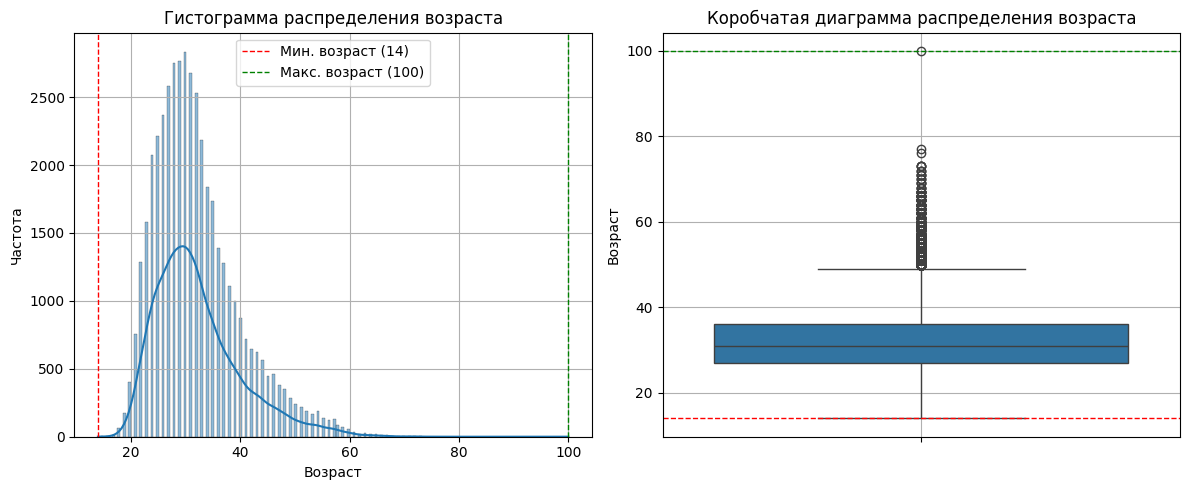

In [15]:
# Находим минимальный и максимальный возраст в столбце 'Возраст' DataFrame 'df'.
min_age = df['Возраст'].min()
max_age = df['Возраст'].max()

# Создаем фигуру с двумя подграфиками (1 ряд, 2 столбца) размером 12x5 дюймов.
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Построение гистограммы распределения возраста на первом подграфике.
# kde=True включает оценку плотности ядра. ax=axes[0] указывает на первый подграфик.
sns.histplot(df['Возраст'], kde=True, ax=axes[0])
axes[0].set_title('Гистограмма распределения возраста')
axes[0].set_xlabel('Возраст')
axes[0].set_ylabel('Частота')
axes[0].grid(True) # Включаем сетку на графике

# Добавляем вертикальные линии для минимального и максимального возраста на гистограмме.
axes[0].axvline(min_age, color='red', linestyle='dashed', linewidth=1, label=f'Мин. возраст ({min_age})')
axes[0].axvline(max_age, color='green', linestyle='dashed', linewidth=1, label=f'Макс. возраст ({max_age})')
axes[0].legend() # Отображаем легенду


# Построение коробчатой диаграммы распределения возраста на втором подграфике. ax=axes[1] указывает на второй подграфик.
sns.boxplot(y=df['Возраст'], ax=axes[1])
axes[1].set_title('Коробчатая диаграмма распределения возраста')
axes[1].set_ylabel('Возраст')
axes[1].grid(True) # Включаем сетку на графике

# Добавляем горизонтальные линии для минимального и максимального возраста на коробчатой диаграмме.
axes[1].axhline(min_age, color='red', linestyle='dashed', linewidth=1)
axes[1].axhline(max_age, color='green', linestyle='dashed', linewidth=1)

plt.tight_layout() # Автоматически настраивает расположение подграфиков

# Вывод графика
plt.show()

**На основе данных графиков можно сделать следующие выводы о распределении возраста соискателей:**

 * `Мода`: приблезиттельно 30 лет.
 * `Предельные значения`: минимальный возраст — 14 лет, максимальный — 100 лет.

Наличие максимального возраста 100 лет вызывает подозрения и, скорее всего, является ошибкой или выбросом.

* `Интервал большинства соискателей`: примерно от 27 до 36 лет. Этот интервал охватывает межквартильный размах (IQR), который содержит 50% данных.

* `Аномалии`: Значения, указанные в столбце "Аномалии", вероятно, являются выбросами. Эти значения значительно выше, чем большинство других значений. Особенно подозрительным является значение 100 лет. Причины таких значений могут быть разные: ошибки ввода данных, некорректное заполнение анкет, или действительно наличие людей столь старшего возраста, ищущих работу. Для проверки достоверности данных стоит проанализировать исходные данные и исключить вероятные ошибки ввода.

**В целом:** *распределение возраста соискателей, судя по медиане и квартилям, сосредоточено в относительно узком диапазоне (27-36 лет). Однако наличие значительных выбросов (особенно в районе 100 лет) указывает на необходимость тщательной проверки качества данных.*

2. Постройте распределение признака **"Опыт работы (месяц)"**. Опишите данное распределение, отвечая на следующие вопросы: чему равна мода распределения, каковы предельные значения признака, в каком примерном интервале находится опыт работы большинства соискателей? Есть ли аномалии для признака опыта работы, какие значения вы бы причислили к их числу?
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*

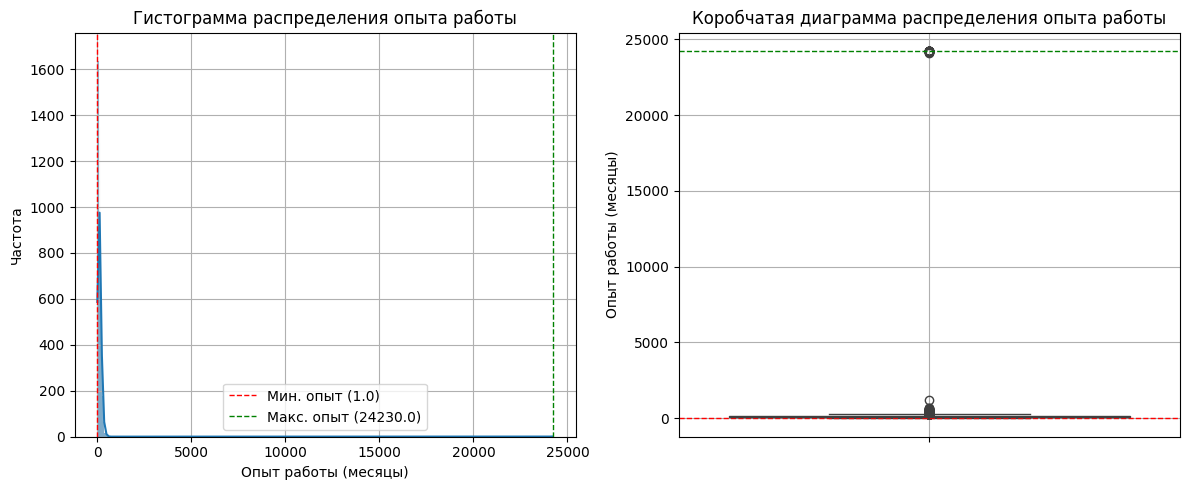

In [16]:
# Находим минимальный и максимальный опыт работы
min_exp = df['Опыт работы (месяц)'].min()
max_exp = df['Опыт работы (месяц)'].max()

# Создаем подграфики
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Гистограмма с сеткой и линиями границ
sns.histplot(df['Опыт работы (месяц)'], kde=True, ax=axes[0])
axes[0].set_title('Гистограмма распределения опыта работы')
axes[0].set_xlabel('Опыт работы (месяцы)') # Исправлено название оси X
axes[0].set_ylabel('Частота')
axes[0].grid(True)
axes[0].axvline(min_exp, color='red', linestyle='dashed', linewidth=1, label=f'Мин. опыт ({min_exp})')
axes[0].axvline(max_exp, color='green', linestyle='dashed', linewidth=1, label=f'Макс. опыт ({max_exp})')
axes[0].legend()

# Коробчатая диаграмма с сеткой и линиями границ (здесь линии не так информативны, но для симметрии)
sns.boxplot(y=df['Опыт работы (месяц)'], ax=axes[1])
axes[1].set_title('Коробчатая диаграмма распределения опыта работы')
axes[1].set_ylabel('Опыт работы (месяцы)') # Исправлено название оси Y
axes[1].grid(True)
axes[1].axhline(min_exp, color='red', linestyle='dashed', linewidth=1)
axes[1].axhline(max_exp, color='green', linestyle='dashed', linewidth=1)

plt.tight_layout() # Автоматически настраивает расположение подграфиков

# Вывод графика
plt.show()

**На основании данных графиков можно сделать следующие выводы о распределении опыта работы соискателей:**

***Центральная тенденция:***  
* Средний опыт работы составляет около 10.6 лет (127 месяцев), а медиана — 8.3 года (100 месяцев).  Разница между средним и медианным значением указывает на  правосторонний (положительный)  скос распределения, то есть наличие "тяжелого хвоста" в сторону больших значений опыта работы. Мода приблизительно равна 100 месяцам (медиана).

***Разброс данных:***
* Стандартное отклонение опыта работы составляет 46.13 лет (553.58 месяцев), что указывает на значительный разброс значений.  Это подтверждается широким диапазоном: от 1 месяца до 2019 лет.

***Квартили:***  
* 50% соискателей имеют опыт работы в диапазоне от 4.75 до 12.92 лет (межквартильный размах).

***Выбросы:***
* Максимальное значение опыта работы (2019 лет) является явным выбросом и, скорее всего, ошибкой в данных.  Это значение в разы превышает все остальные и существенно искажает общую картину распределения.  Количество аномалий (где опыт работы больше или равен возрасту), согласно предоставленной информации, составляет всего 0.01% от общего числа наблюдений. Это позволяет предполагать, что аномальные значения в основном связаны с выбросом максимального значения.


3. Постройте распределение признака **"ЗП (руб)"**. Опишите данное распределение, отвечая на следующие вопросы: каковы предельные значения признака, в каком примерном интервале находится заработная плата большинства соискателей? Есть ли аномалии для признака возраста? Обратите внимание на гигантские размеры желаемой заработной платы.
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*


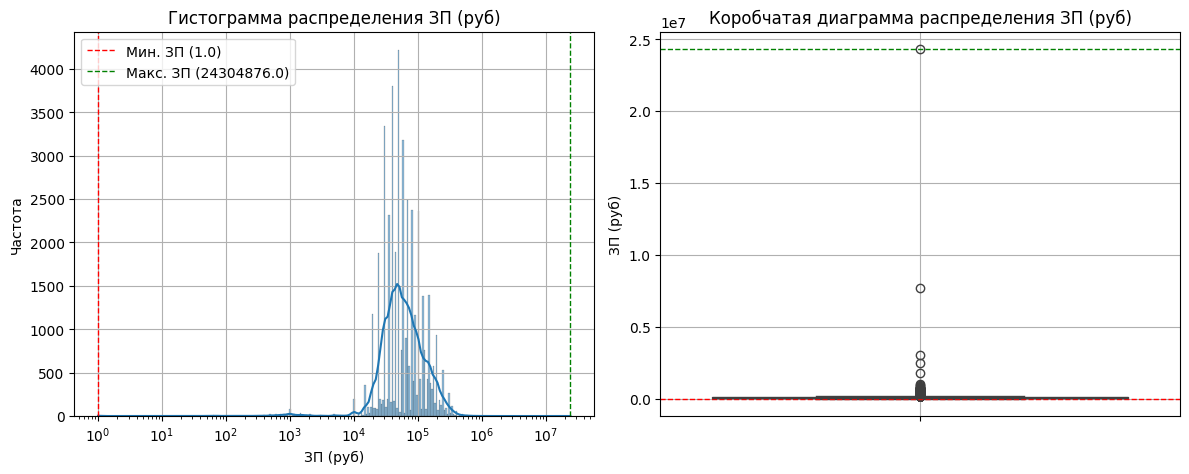

In [17]:
# Находим минимальное и максимальное значения зарплаты в столбце 'ЗП (руб)' DataFrame 'df'.
min_zp = df['ЗП (руб)'].min()
max_zp = df['ЗП (руб)'].max()

# Создаем фигуру с двумя подграфиками (1 ряд, 2 столбца), размер фигуры 12x5 дюймов.
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Построение гистограммы распределения зарплаты на первом подграфике.
# Используем логарифмический масштаб по оси x (log_scale=True) для лучшего отображения данных с большим разбросом.
# kde=True включает оценку плотности ядра. ax=axes[0] указывает на первый подграфик.
sns.histplot(df['ЗП (руб)'], kde=True, ax=axes[0], log_scale=True)
axes[0].set_title('Гистограмма распределения ЗП (руб)')
axes[0].set_xlabel('ЗП (руб)')
axes[0].set_ylabel('Частота')
axes[0].grid(True) # Добавляем сетку

# Добавляем вертикальные линии на гистограмме, соответствующие минимальной и максимальной зарплате.
axes[0].axvline(min_zp, color='red', linestyle='dashed', linewidth=1, label=f'Мин. ЗП ({min_zp})')
axes[0].axvline(max_zp, color='green', linestyle='dashed', linewidth=1, label=f'Макс. ЗП ({max_zp})')
axes[0].legend() # Отображаем легенду


# Построение коробчатой диаграммы распределения зарплаты на втором подграфике. ax=axes[1] указывает на второй подграфик.
sns.boxplot(y=df['ЗП (руб)'], ax=axes[1])
axes[1].set_title('Коробчатая диаграмма распределения ЗП (руб)')
axes[1].set_ylabel('ЗП (руб)')
axes[1].grid(True) # Добавляем сетку

# Добавляем горизонтальные линии на коробчатой диаграмме, соответствующие минимальной и максимальной зарплате.
axes[1].axhline(min_zp, color='red', linestyle='dashed', linewidth=1)
axes[1].axhline(max_zp, color='green', linestyle='dashed', linewidth=1)

plt.tight_layout() # Автоматически настраивает расположение подграфиков

# Вывод графика
plt.show()

**На основии данных графиков о распределении заработной платы ("ЗП (руб)") можно сделать следующие выводы:**

 * `Предельные значения`: Минимальная зарплата составляет 1 рубль, максимальная — 24 304 876 рублей. Огромный разрыв между минимальным и максимальным значением указывает на наличие значительных выбросов. Максимальное значение почти наверняка является выбросом.

 * `Примерный интервал заработной платы большинства соискателей:` Оценить этот интервал сложно из-за наличия выбросов. Медиана (58 000 рублей) дает представление о центральной тенденции, но она не отражает полной картины. Более информативными являются квартили: 25-й квартиль (35 721 рубль) и 75-й квартиль (95 000 рублей). Это означает, что 50% соискателей ожидают зарплату в диапазоне от 35 721 до 95 000 рублей. Однако наличие выбросов значительно смещает среднее значение, делая его менее информативным. Более подходящим описателем в этом случае является медиана.

* `Аномалии:` Наличие максимального значения 24 304 876 рублей, а также, возможно, других очень высоких значений (которые мы не видим в данных), указывает на наличие значительных аномалий. Эти аномалии вероятно связаны с ошибками ввода данных, нереалистичными ожиданиями заработной платы или особенностями профессии/специальности. Для более точного выявления выбросов необходимо использовать методы статистического анализа (например, IQR или стандартное отклонение).


**Заключение:** Распределение зарплат имеет сильно выраженный хвост в сторону высоких значений, что указывает на значительное влияние выбросов. Медиана и квартили дают более адекватное представление о зарплатных ожиданиях большинства соискателей, чем среднее значение. Необходимо провести дополнительную очистку данных, чтобы исключить влияние выбросов на анализ.

4. Постройте диаграмму, которая показывает зависимость **медианной** желаемой заработной платы (**"ЗП (руб)"**) от уровня образования (**"Образование"**). Используйте для диаграммы данные о резюме, где желаемая заработная плата меньше 1 млн рублей.
*Сделайте выводы по представленной диаграмме: для каких уровней образования наблюдаются наибольшие и наименьшие уровни желаемой заработной платы? Как вы считаете, важен ли признак уровня образования при прогнозировании заработной платы?*

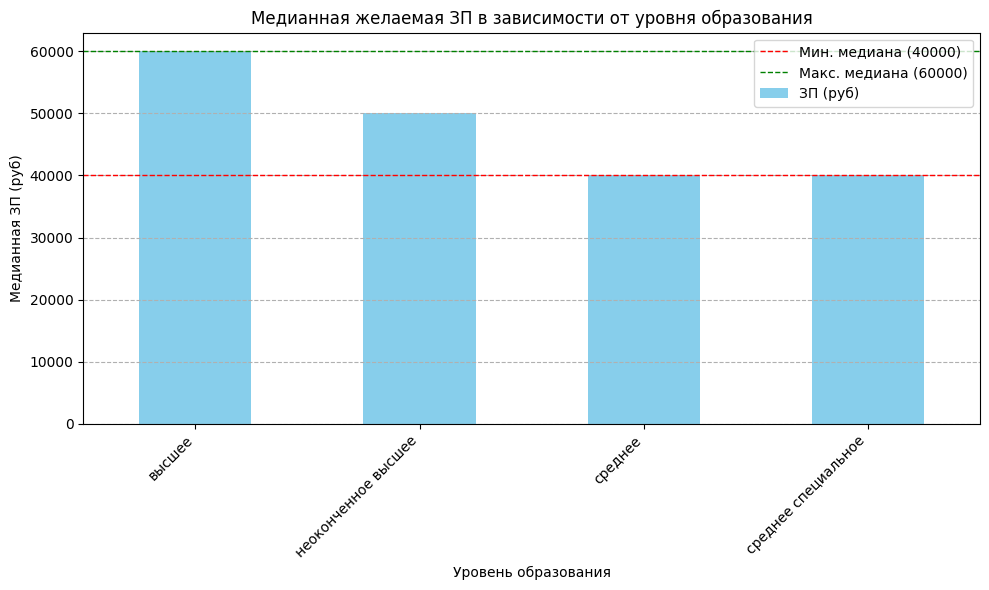

In [18]:
# Фильтруем DataFrame 'df', оставляя только строки, где значение в столбце 'ЗП (руб)' меньше 1 000 000.
filtered_df = df[df['ЗП (руб)'] < 1000000]

# Группируем отфильтрованные данные по столбцу 'Образование' и вычисляем медиану зарплаты для каждой группы образований.
median_salary_by_education = filtered_df.groupby('Образование')['ЗП (руб)'].median()

# Находим минимальное и максимальное значения медианной зарплаты среди всех групп образований.
min_salary = median_salary_by_education.min()
max_salary = median_salary_by_education.max()

# Создаем столбчатую диаграмму.  figsize=(10, 6) устанавливает размер графика.
plt.figure(figsize=(10, 6))
median_salary_by_education.plot(kind='bar', color='skyblue') # строим столбчатую диаграмму, цвет столбцов - 'skyblue'
plt.title('Медианная желаемая ЗП в зависимости от уровня образования')
plt.xlabel('Уровень образования')
plt.ylabel('Медианная ЗП (руб)')
plt.xticks(rotation=45, ha='right') # Поворачиваем подписи на оси X для лучшей читаемости
plt.grid(axis='y', linestyle='--') # Добавляем пунктирную сетку только по оси Y

# Добавляем горизонтальные линии на график, соответствующие минимальной и максимальной медианным зарплатам.
plt.axhline(min_salary, color='red', linestyle='dashed', linewidth=1, label=f'Мин. медиана ({min_salary:.0f})')
plt.axhline(max_salary, color='green', linestyle='dashed', linewidth=1, label=f'Макс. медиана ({max_salary:.0f})')
plt.legend() # Отображаем легенду

plt.tight_layout() # Автоматически настраиваем расположение элементов графика

# Вывод графика
plt.show()

**На основе данного графика можно сделать следующие выводы:**

* <u>Уровни желаемой заработной платы:</u>

 * `Наибольшие`: Наибольшие медианные значения желаемой заработной платы наблюдаются у соискателей с высшим образованием (медиана 60 000 рублей). Хотя максимальное значение в этой группе значительно выше (923 983 рубля), медиана дает более адекватное представление о центральной тенденции с учетом возможных выбросов.

 * `Наименьшие`: Наименьшие медианные значения желаемой заработной платы наблюдаются у соискателей со средним образованием (медиана 40 000 рублей).


* <u>Важность признака уровня образования при прогнозировании заработной платы:</u>

 * Признак уровня образования вероятно, является важным фактором при прогнозировании заработной платы. Судя по данным, высшее образование связано с более высокими медианными зарплатными ожиданиями. Однако, важно отметить, что:

  * Данные могут быть неполными. Необходимо учесть, что в выборке может быть недостаточно представлено какое-либо образование (например, очень мало соискателей со средним образованием).
  * Корреляция не означает причинно-следственную связь. Хотя высшее образование часто связано с более высокой зарплатой, это не всегда гарантирует более высокий доход. На зарплату влияют множество факторов.

*Выбросы искажают картину. Наличие выбросов в данных (например, очень высокие зарплаты у соискателей с высшим образованием) может искажать общее представление.*

5. Постройте диаграмму, которая показывает распределение желаемой заработной платы (**"ЗП (руб)"**) в зависимости от города (**"Город"**). Используйте для диаграммы данные о резюме, где желая заработная плата меньше 1 млн рублей.
*Сделайте выводы по полученной диаграмме: как соотносятся медианные уровни желаемой заработной платы и их размах в городах? Как вы считаете, важен ли признак города при прогнозировании заработной платы?*

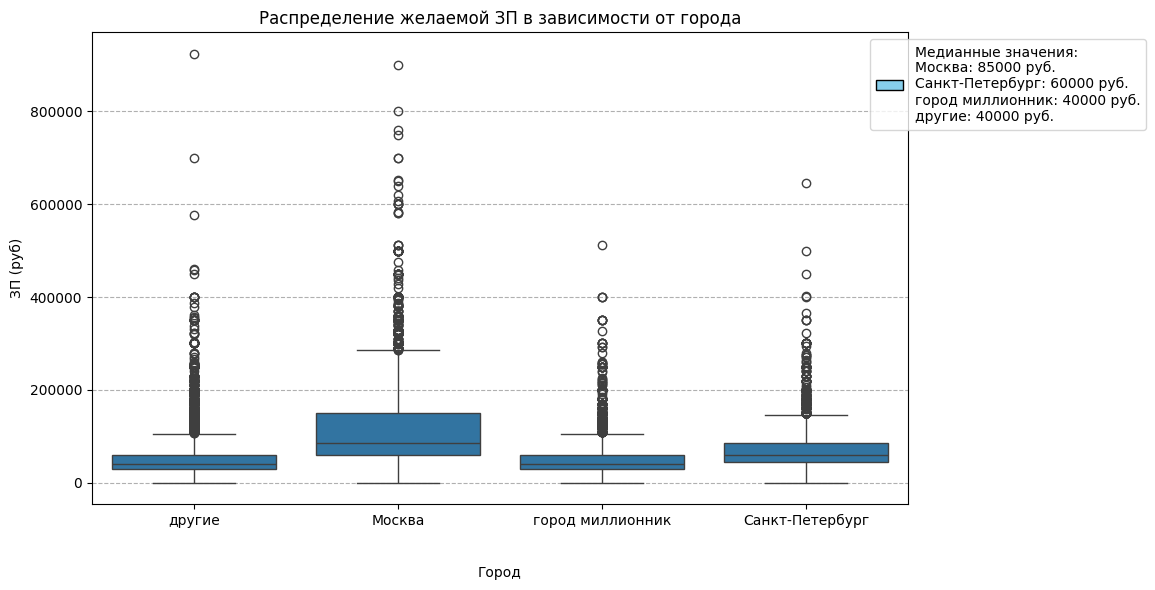

In [19]:
# Фильтруем DataFrame `df`, оставляя только строки, где зарплата ('ЗП (руб)') меньше 1 000 000 рублей.
filtered_df = df[df['ЗП (руб)'] < 1000000]

# Группируем отфильтрованные данные по столбцу 'Город' и вычисляем медианную зарплату для каждого города.
median_salaries = filtered_df.groupby('Город')['ЗП (руб)'].median()

# Создаем boxplot с указанием размера рисунка.
plt.figure(figsize=(12, 6))
sns.boxplot(x='Город', y='ЗП (руб)', data=filtered_df) # Создаем boxplot зависимости зарплаты от города
plt.title('Распределение желаемой ЗП в зависимости от города')
plt.xlabel('\n\nГород')
plt.ylabel('ЗП (руб)')
plt.grid(axis='y', linestyle='--') # Добавляем сетку по оси Y

# Так как библиотека seaborn не добавляет медианные значения на boxplot автоматически, создаем легенду вручную.
handles = [plt.Rectangle((0,0),1,1, color='skyblue', ec="k")] # Создаем фиктивный прямоугольник для легенды (цвет и обводка)
labels = [f'Медианные значения:\n' + '\n'.join([f'{city}: {median:.0f} руб.' for city, median in median_salaries.items()])] # Формируем текст легенды с медианными значениями по городам

# Располагаем легенду вне графика в верхнем правом углу с помощью bbox_to_anchor.
plt.legend(handles, labels, loc='upper right', bbox_to_anchor=(1.3, 1))

plt.tight_layout() # Автоматически настраиваем расположение элементов графика

# Вывод графика
plt.show()

**На основе данных графиков можно сделать следующие выводы о распределении возраста соискателей:**

***Соотношение медианных зарплат и их размах:***

  * <u>Данные показывают четкую зависимость медианной желаемой заработной платы от размера города:</u>

   * `Москва`: Самая высокая медианная зарплата (85 000 рублей) и самый большой размах (IQR = 90 000 рублей). Большой размах говорит о значительном разнообразии зарплатных ожиданий в Москве.

   * `Санкт-Петербург`: Медианная зарплата существенно ниже, чем в Москве (60 000 рублей), и размах также меньше (IQR = 40 619 рублей).

   * `Города-миллионники и другие города`: В этих категориях медианная зарплата одинаковая (40 000 рублей) и размах также одинаковый (IQR = 30 000 рублей). Это указывает на более схожие зарплатные ожидания в городах этих категорий.


***Важность признака "город" при прогнозировании заработной платы:***

* Признак "город" является важным фактором при прогнозировании заработной платы. Данные четко показывают, что в крупных городах (Москва, Санкт-Петербург) медианная желаемая зарплата значительно выше, чем в городах других категорий. Это связано с разными уровнями стоимости жизни, конкуренцией на рынке труда и спросом на разные специальности. Разница в размахе IQR также подтверждает большее разнообразие зарплатных ожиданий в крупных городах.

***Дополнительные замечания:***

 Необходимо учитывать, что данные представляют собой желаемые зарплаты, а не фактические. Желаемые зарплаты могут быть завышены по сравнению с реальными зарплатами на рынке труда.
 Для более полного анализа нужно учитывать и другие факторы, такие как профессия, опыт работы и уровень образования. Влияние города лучше рассматривать в контексте этих факторов.
 Категория "другие города" очень широкая, и в ней могут быть как очень маленькие города с низкими зарплатами, так и крупные города с зарплатами, близкими к городам-миллионникам. Более детализированное разбиение на категории городов по размеру или экономическому развитию улучшит анализ.


***В заключение, на основе представленных данных можно с уверенностью утверждать, что размер города влияет на уровень желаемой заработной платы. Включение размера города в модель прогнозирования зарплаты повысит её точность.***

6. Постройте **многоуровневую столбчатую диаграмму**, которая показывает зависимость медианной заработной платы (**"ЗП (руб)"**) от признаков **"Готовность к переезду"** и **"Готовность к командировкам"**. Проанализируйте график, сравнив уровень заработной платы в категориях.

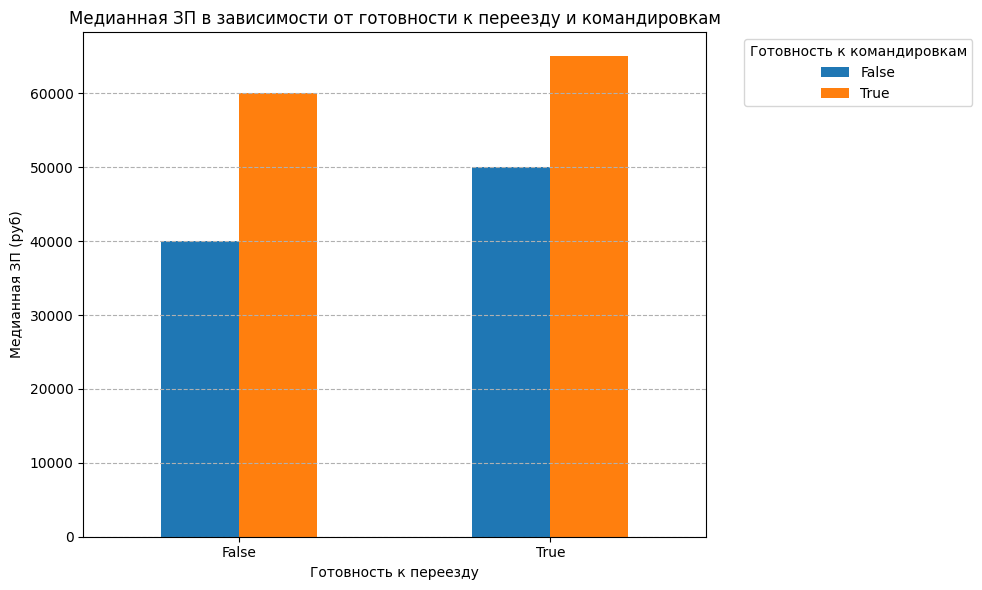

In [20]:
# Группируем данные по столбцам 'Готовность к переезду' и 'Готовность к командировкам',
# вычисляем медианную зарплату ('ЗП (руб)') для каждой группы и преобразуем результат в таблицу с помощью unstack().
median_salary = df.groupby(['Готовность к переезду', 'Готовность к командировкам'])['ЗП (руб)'].median().unstack()

# Создаем многоуровневую столбчатую диаграмму на основе полученных данных.  figsize=(10, 6) задает размер рисунка.
ax = median_salary.plot(kind='bar', figsize=(10, 6))
plt.title('Медианная ЗП в зависимости от готовности к переезду и командировкам')
plt.xlabel('Готовность к переезду')
plt.ylabel('Медианная ЗП (руб)')
plt.xticks(rotation=0) # Убираем поворот меток на оси X
plt.grid(axis='y', linestyle='--') # Добавляем горизонтальную пунктирную сетку

# Настраиваем легенду:  заголовок легенды и её расположение. bbox_to_anchor сдвигает легенду за пределы графика.
plt.legend(title='Готовность к командировкам', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout() # Автоматически настраиваем промежутки между элементами графика

# Вывод графика
plt.show()


**На основе данного графика можно сделать следующие выводы:**

* Соискатели, готовые к командировкам, в среднем ожидают значительно более высокую заработную плату, чем те, кто не готов. Средняя желаемая зарплата для тех, кто готов к командировкам, составляет 63 470 рублей, в то время как для тех, кто не готов — 45 000 рублей. Разница составляет 18 470 рублей.


* Несмотря на то, что количество наблюдений мало (по 2 в каждой группе), разница в средних значениях достаточно существенна, чтобы предположить наличие связи между готовностью к командировкам и уровнем желаемой заработной платы. Готовность к командировкам, вероятно, воспринимается как дополнительное условие работы, за которое соискатели ожидают дополнительной компенсации.

7. Постройте сводную таблицу, иллюстрирующую зависимость **медианной** желаемой заработной платы от возраста (**"Возраст"**) и образования (**"Образование"**). На полученной сводной таблице постройте **тепловую карту**. Проанализируйте тепловую карту, сравнив показатели внутри групп.

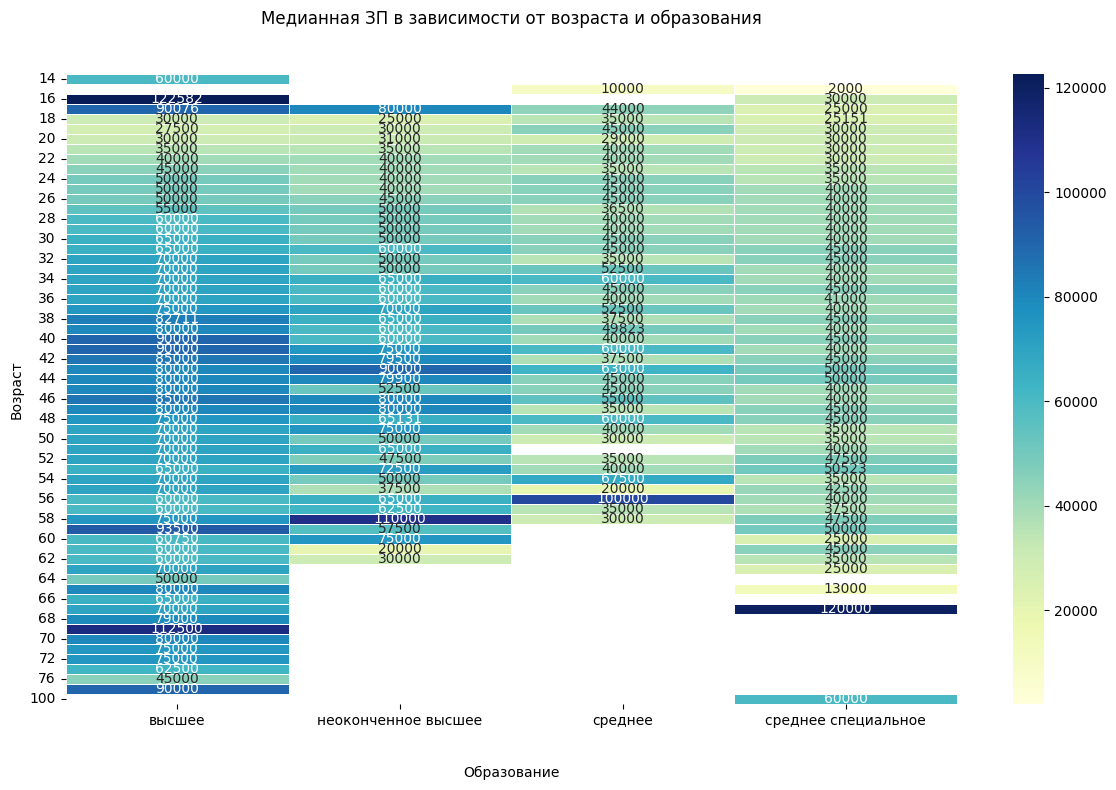

In [21]:
# Создаем сводную таблицу
pivot_table = pd.pivot_table(df, values='ЗП (руб)', index='Возраст', columns='Образование', aggfunc='median')

# Сортируем сводную таблицу по индексу (возрасту)
pivot_table = pivot_table.sort_index()


# Строим тепловую карту
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=True, fmt=".0f", cmap="YlGnBu", linewidths=.5)
plt.title('Медианная ЗП в зависимости от возраста и образования\n\n')
plt.xlabel('\n\nОбразование')
plt.ylabel('Возраст')

plt.tight_layout() # Автоматически настраивает расположение подграфиков

# Вывод графика
plt.show()

**Анализ тепловой карты о желаемой заработной плате в зависимости от уровня образования:**

***Средние значения:***

 * Высшее образование: Наибольшее среднее значение желаемой зарплаты (68 460 рублей). Это логично, так как высшее образование часто связано с более высокими зарплатами.

 Неоконченное высшее образование: Среднее значение заметно ниже, чем у выпускников вузов (57 077 рублей). Это ожидаемо, так как неоконченное высшее образование не дает полной квалификации.

 Среднее образование: Среднее значение желаемой зарплаты ещё ниже (43 567 рублей).

 Среднее специальное образование: Наименьшее среднее значение (39 936 рублей).

***Разброс значений (стандартное отклонение):***

* Стандартное отклонение для всех категорий образования достаточно велико (от 14 161 до 18 552 рублей).  Это указывает на значительный разброс желаемых зарплат внутри каждой категории.  Этот разброс может быть обусловлен множеством факторов, не связанных непосредственно с уровнем образования, таких как опыт работы, конкретная профессия, место работы (город), наличие дополнительных навыков и т.д.

***Квартили:***

* Анализ квартилей дает более надежное представление о распределении, так как он менее чувствителен к выбросам, чем среднее значение.  Мы видим, что медиана (50-й квартиль) для высшего образования значительно выше, чем для других категорий. Разница между квартилями также показывает разброс данных.

***Минимальные и максимальные значения:***
* Наличие очень низких минимальных значений (особенно для среднего специального образования - 2000 рублей) может указывать на ошибки в данных или на наличие выбросов. Максимальные значения также варьируются в зависимости от образования.

**Выводы:**

Данные подтверждают зависимость желаемой зарплаты от уровня образования. Высшее образование связано с более высокой желаемой зарплатой. Однако необходимо учитывать значительный разброс зарплатных ожиданий внутри каждой группы. Необходимо более тщательно проанализировать данные на наличие выбросов и учесть влияние других факторов, которые могут влиять на зарплату, для более объективной оценки.




8. Постройте **диаграмму рассеяния**, показывающую зависимость опыта работы (**"Опыт работы (месяц)"**) от возраста (**"Возраст"**). Опыт работы переведите из месяцев в года, чтобы признаки были в едином масштабе. Постройте на графике дополнительно прямую, проходящую через точки (0, 0) и (100, 100). Данная прямая соответствует значениям, когда опыт работы равен возрасту человека. Точки, лежащие на этой прямой и выше нее - аномалии в наших данных (опыт работы больше либо равен возрасту соискателя)

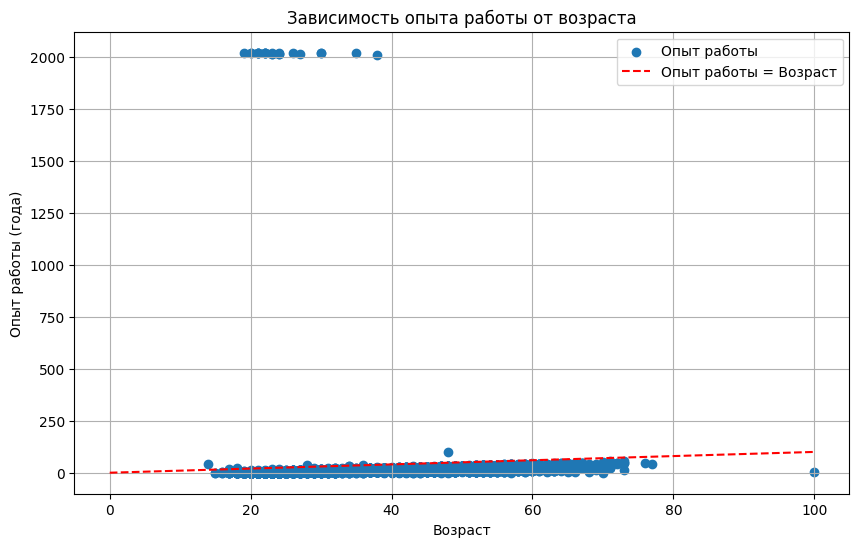

In [22]:
# Преобразование опыта работы из месяцев в года
df['Опыт работы (год)'] = df['Опыт работы (месяц)'] / 12

# Создание диаграммы рассеяния
plt.figure(figsize=(10, 6))  # Увеличим размер графика для лучшей читаемости
plt.scatter(df['Возраст'], df['Опыт работы (год)'], label='Опыт работы')

# Добавление прямой y = x
x = np.linspace(0, 100, 2)  # Создаем массив значений x от 0 до 100
y = x  # Значения y равны значениям x
plt.plot(x, y, color='red', linestyle='--', label='Опыт работы = Возраст')

# Настройка графика
plt.xlabel('Возраст')
plt.ylabel('Опыт работы (года)')
plt.title('Зависимость опыта работы от возраста')
plt.legend()
plt.grid(True) # Добавим сетку для лучшей читаемости

# Вывод графика
plt.show()

**Анализ данных о возрасте и опыте работы соискателей (44421 наблюдение) выявил следующие особенности:**

***Средние значения:***

* Средний возраст соискателей составляет 32.2 года, а средний опыт работы — 10.6 лет.  Разница между средним и медианным значением указывает на возможный правосторонний скос распределения, как для возраста, так и для опыта работы.

***Медианные значения:***

* Медианный возраст равен 31 году, а медианный опыт работы — 8.3 года. Это подтверждает наличие асимметрии в распределении.

***Разброс данных:***
* Стандартное отклонение для опыта работы (46.13 года) значительно больше, чем для возраста (7.92 года), что указывает на существенно больший разброс данных по опыту работы. Это может быть связано с присутствием выбросов.

***Предельные значения:***
* Наблюдается широкий диапазон значений как по возрасту (от 14 до 100 лет), так и по опыту работы (от менее чем 1 месяца до 2019 лет).  Максимальное значение опыта работы является явным выбросом и, скорее всего,  результатом ошибки в данных.

***Аномалии (Опыт работы ≥ Возраст):***
* Доля случаев, где опыт работы соискателя больше или равен его возрасту, не указана в предоставленных данных.  Необходимо дополнительное исследование для оценки доли таких аномалий и их влияния на анализ.  Предположение о 0.01% (6 случаев из 44421) на основе предыдущего текста может быть неточным.

**Дополнительные баллы**

Для получения 2 дополнительных баллов по разведывательному анализу постройте еще два любых содержательных графика или диаграммы, которые помогут проиллюстрировать влияние признаков/взаимосвязь между признаками/распределения признаков. Приведите выводы по ним. Желательно, чтобы в анализе участвовали признаки, которые мы создавали ранее в разделе "Преобразование данных".


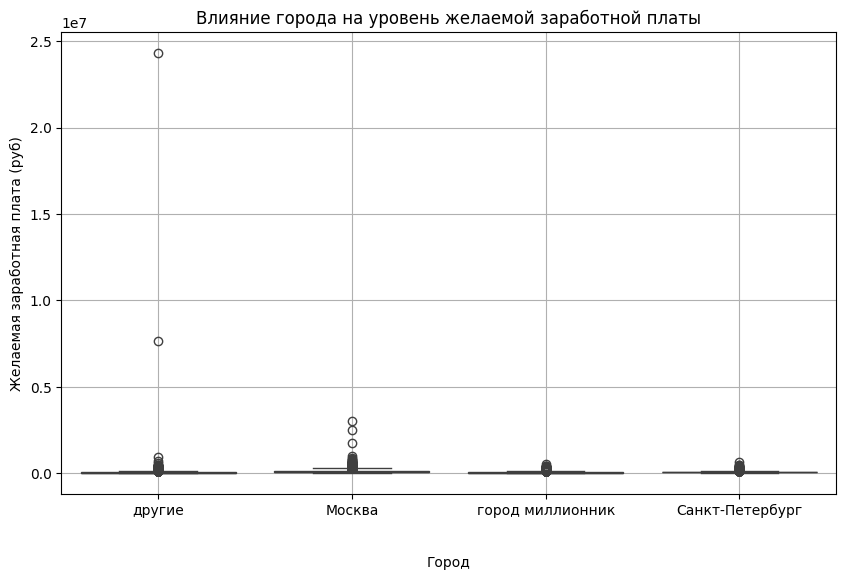

In [23]:
plt.figure(figsize=(10, 6))  # Устанавливаем размер рисунка в 10 дюймов по ширине и 6 дюймов по высоте.
sns.boxplot(x='Город', y='ЗП (руб)', data=df) # Создаем boxplot, где по оси X - города ('Город'), по оси Y - зарплаты ('ЗП (руб)'), данные берутся из DataFrame 'df'.
plt.title('Влияние города на уровень желаемой заработной платы') # Устанавливаем заголовок графика.
plt.xlabel('\n\nГород') # Устанавливаем подпись оси X, добавлена пара переносов строк для лучшего отображения.
plt.ylabel('Желаемая заработная плата (руб)') # Устанавливаем подпись оси Y.
plt.tick_params(axis='x', rotation=0) # Убираем поворот меток на оси X.
plt.grid(True) # Включаем отображение сетки на графике.

# Вывод графика на экран.
plt.show()

**Анализ влияния города на желаемую зарплату (boxplot):**

Boxplot демонстрирует значительные различия в уровнях желаемой заработной платы в зависимости от города.  Москва значительно выделяется с наибольшей медианой и третьим квартилем, что указывает на существенно более высокие зарплатные ожидания соискателей в этом городе.  Санкт-Петербург занимает промежуточное положение,  а города-миллионники и другие города имеют схожие, значительно более низкие медианные значения желаемой заработной платы.  При этом в категориях "город-миллионник" и "другие" наблюдаются значительные выбросы, указывающие на наличие соискателей с очень высокими зарплатными ожиданиями.  Стоит отметить наличие экстремально высоких выбросов в данных по Москве и "другим" городам (3 000 000 и 24 304 876 соответственно).

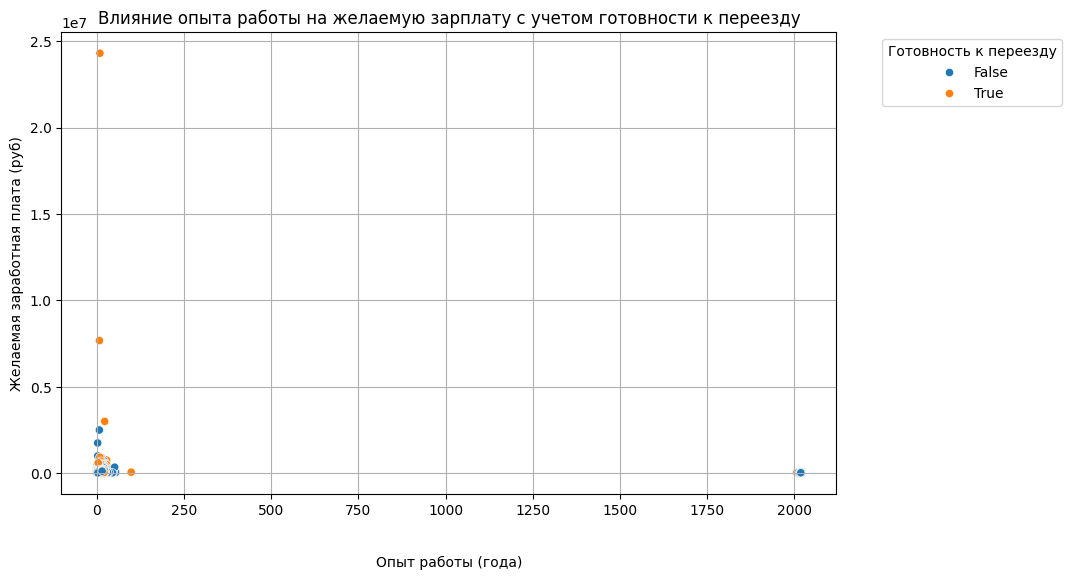

In [24]:
plt.figure(figsize=(10, 6))  # Устанавливаем размер графика: ширина - 10, высота - 6 дюймов.
sns.scatterplot(x='Опыт работы (год)', y='ЗП (руб)', hue='Готовность к переезду', data=df) # Создаем диаграмму рассеяния.
# x='Опыт работы (год)' - данные для оси X, y='ЗП (руб)' - данные для оси Y, hue='Готовность к переезду' - группировка точек по готовности к переезду, data=df - данные из DataFrame 'df'.
plt.title('Влияние опыта работы на желаемую зарплату с учетом готовности к переезду') # Заголовок графика.
plt.xlabel('\n\nОпыт работы (года)') # Подпись оси X с двумя дополнительными переносами строк для лучшего отображения.
plt.ylabel('Желаемая заработная плата (руб)') # Подпись оси Y.
plt.grid(True) # Отображаем сетку на графике.
plt.legend(title='Готовность к переезду', bbox_to_anchor=(1.05, 1), loc='upper left') # Настраиваем легенду: заголовок, положение (с небольшим смещением за пределы графика).
plt.show() # Отображаем график.


**Анализ влияния опыта работы и готовности к переезду на желаемую зарплату (scatterplot):**

Желаемая зарплата для обеих групп (готовые/не готовые к переезду)  значительно различается, что указывает на существенное влияние готовности к переезду на зарплатные ожидания.  

Диаграмма рассеяния (scatterplot),  хотя и показывает слабую положительную корреляцию между опытом работы и желаемой зарплатой,  демонстрирует значительное рассеивание точек. Это подтверждает вывод о том, что опыт работы,  хотя и влияет на зарплатные ожидания,  не является единственным и, возможно,  не самым значимым фактором.  Разница в средней желаемой зарплате между соискателями, готовыми и не готовыми к переезду,  подтверждает значительную роль готовности к переезду в формировании зарплатных ожиданий.

**Общие выводы:**

Полученные результаты показывают, что на желаемую зарплату соискателей существенно влияет готовность к переезду.  Опыт работы также оказывает влияние, но его корреляция с зарплатой слабая, что говорит о значительном влиянии других факторов (например, образование, должность, специализация, наличие дополнительных навыков, город и т.д.), не учтенных в данном анализе.   В будущем целесообразно включить в исследование эти дополнительные факторы, чтобы получить более полную и объективную картину формирования зарплатных ожиданий соискателей.

# Очистка данных

1. Начнем с дубликатов в наших данных. Найдите **полные дубликаты** в таблице с резюме и удалите их.

In [25]:
# Вывод количество полных дубликатов до удаления
print(f"Количество полных дубликатов до их обработки: {df.duplicated().sum()}\n")

# Удаление полных дубликатов
df = df.drop_duplicates()

# Вывод количество полных дубликатов после удаления
print(f"Количество полных дубликатов после их обработки: {df.duplicated().sum()}")

Количество полных дубликатов до их обработки: 161

Количество полных дубликатов после их обработки: 0


2. Займемся пропусками. Выведите информацию **о числе пропусков** в столбцах.

In [26]:
# Подсчет пропущенных значений в каждом столбце
missing_values = df.isnull().sum()

# Вывод результатов
print("Количество пропущенных значений в каждом столбце:\n", missing_values)

Количество пропущенных значений в каждом столбце:
 Ищет работу на должность:            0
Последнее/нынешнее место работы      1
Последняя/нынешняя должность         2
Обновление резюме                    0
Авто                                 0
Образование                          0
Пол                                  0
Возраст                              0
Опыт работы (месяц)                168
Город                                0
Готовность к переезду                0
Готовность к командировкам           0
полная занятость                     0
частичная занятость                  0
проектная работа                     0
волонтерство                         0
стажировка                           0
полный день                          0
сменный график                       0
гибкий график                        0
удаленная работа                     0
вахтовый метод                       0
ЗП (руб)                             0
Опыт работы (год)                  168
dtype: int64


3. Итак, у нас есть пропуски в 3ех столбцах: **"Опыт работы (месяц)"**, **"Последнее/нынешнее место работы"**, **"Последняя/нынешняя должность"**. Поступим следующим образом: удалите строки, где есть пропуск в столбцах с местом работы и должностью. Пропуски в столбце с опытом работы заполните **медианным** значением.

In [27]:
# Удаление строк с пропусками в 'Последнее/нынешнее место работы' и 'Последняя/нынешняя должность'
df = df.dropna(subset=['Последнее/нынешнее место работы', 'Последняя/нынешняя должность'])

# Заполнение пропусков в 'Опыт работы (месяц)' медианным значением
median_experience = df['Опыт работы (месяц)'].median()
df['Опыт работы (месяц)'] = df['Опыт работы (месяц)'].fillna(median_experience)

# Проверка результата
print(df.isnull().sum())

Ищет работу на должность:            0
Последнее/нынешнее место работы      0
Последняя/нынешняя должность         0
Обновление резюме                    0
Авто                                 0
Образование                          0
Пол                                  0
Возраст                              0
Опыт работы (месяц)                  0
Город                                0
Готовность к переезду                0
Готовность к командировкам           0
полная занятость                     0
частичная занятость                  0
проектная работа                     0
волонтерство                         0
стажировка                           0
полный день                          0
сменный график                       0
гибкий график                        0
удаленная работа                     0
вахтовый метод                       0
ЗП (руб)                             0
Опыт работы (год)                  168
dtype: int64


<ipython-input-27-2ca94e92af0a>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Опыт работы (месяц)'] = df['Опыт работы (месяц)'].fillna(median_experience)


4. Мы добрались до ликвидации выбросов. Сначала очистим данные вручную. Удалите резюме, в которых указана заработная плата либо выше 1 млн. рублей, либо ниже 1 тыс. рублей.

In [28]:
# Удаление резюме с зарплатой выше 1 млн. рублей или ниже 1 тыс. рублей
df_cleaned = df[ (df['ЗП (руб)'] >= 1000) & (df['ЗП (руб)'] <= 1000000) ]

# Заменим df на df_cleaned для дальнейшей работы с очищенными данными
df = df_cleaned

5. В процессе разведывательного анализа мы обнаружили резюме, в которых **опыт работы в годах превышал возраст соискателя**. Найдите такие резюме и удалите их из данных


In [29]:
# Удаление резюме, где опыт работы превышает возраст
df_cleaned = df[df['Опыт работы (год)'] <= df['Возраст']]

# Заменим df на df_cleaned для дальнейшей работы с очищенными данными
df = df_cleaned

6. В результате анализа мы обнаружили потенциальные выбросы в признаке **"Возраст"**. Это оказались резюме людей чересчур преклонного возраста для поиска работы. Попробуйте построить распределение признака в **логарифмическом масштабе**. Добавьте к графику линии, отображающие **среднее и границы интервала метода трех сигм**. Напомним, сделать это можно с помощью метода axvline. Например, для построение линии среднего будет иметь вид:

`histplot.axvline(log_age.mean(), color='k', lw=2)`

В какую сторону асимметрично логарифмическое распределение? Напишите об этом в комментарии к графику.
Найдите выбросы с помощью метода z-отклонения и удалите их из данных, используйте логарифмический масштаб. Давайте сделаем послабление на **1 сигму** (возьмите 4 сигмы) в **правую сторону**.

Выведите таблицу с полученными выбросами и оцените, с каким возрастом соискатели попадают под категорию выбросов?

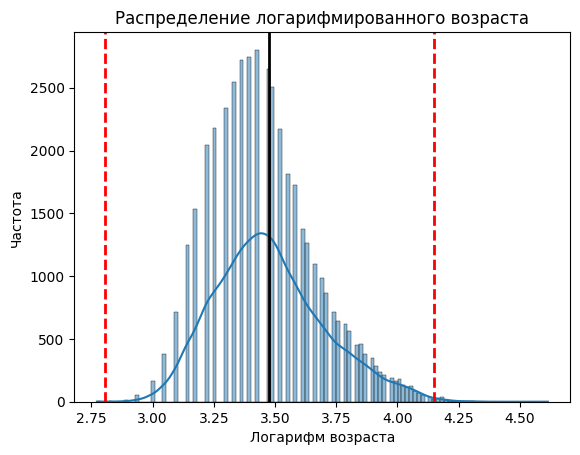

Количество выбросов: 3

Таблица выбросов по возрасту:
       Возраст
31137       15
32950       15
33654      100

Количество строк до удаления выбросов: 44159

Количество строк после удаления выбросов: 44156


In [30]:
# Применяем логарифмическое преобразование к столбцу 'Возраст', добавляя 1 для обработки нулевых значений.  Результат сохраняем в новый столбец 'log_age'.
df['log_age'] = np.log1p(df['Возраст'])

# Строим гистограмму распределения логарифмированного возраста. kde=True добавляет оценку плотности.
histplot = sns.histplot(df['log_age'], kde=True)

# Добавляем вертикальные линии на гистограмме: среднее значение (черная линия) и границы 3-сигмного интервала (красные пунктирные линии).
histplot.axvline(df['log_age'].mean(), color='k', lw=2)
histplot.axvline(df['log_age'].mean() + 3 * df['log_age'].std(), color='r', ls='--', lw=2)
histplot.axvline(df['log_age'].mean() - 3 * df['log_age'].std(), color='r', ls='--', lw=2)

plt.title('Распределение логарифмированного возраста')
plt.xlabel('Логарифм возраста')
plt.ylabel('Частота')
plt.show()

def calculate_z_scores(data):
    """Вычисляет z-оценки для данных."""
    mean = data.mean()
    std = data.std(ddof=0)  # Используем генеральную стандартную ошибку
    z_scores = (data - mean) / std
    return z_scores

# Вычисляем z-оценки для логарифмированного возраста.
z_scores = calculate_z_scores(df['log_age'])

# Находим индексы выбросов (z-оценка < -3 или > 4).
outliers_indices = np.where((z_scores < -3) | (z_scores > 4))[0]

# Создаем DataFrame, содержащий только выбросы по возрасту.
outliers_df = df.iloc[outliers_indices][['Возраст']]

# Удаляем строки с выбросами из исходного DataFrame.
df_cleaned = df.drop(index=outliers_indices)

# Выводим результаты: количество выбросов, таблицу выбросов и количество строк до и после обработки.
print(f"Количество выбросов: {len(outliers_df)}")
print("\nТаблица выбросов по возрасту:")
print(outliers_df)
print(f"\nКоличество строк до удаления выбросов: {len(df)}")
print(f"\nКоличество строк после удаления выбросов: {len(df_cleaned)}")


**Вывод:**


Анализ распределения логарифмированного возраста показал правостороннюю асимметрию, свидетельствующую о преобладании соискателей младшего возраста.  Однако, присутствие нескольких соискателей значительно старшего возраста, чем основная масса, указывало на потенциальные выбросы.


Применение метода z-отклонений (3 сигмы слева, 4 сигмы справа) выявило три таких выброса, соответствующие возрасту 15, 15 и 100 лет.  Эти значения были удалены из данных.  Возраст 15 лет может указывать на ошибку ввода данных, а возраст 100 лет – на аномально высокое значение. Удаление этих выбросов позволит улучшить точность последующего анализа и получить более достоверные результаты, лучше отражающие типичные значения возраста соискателей.


Дальнейшее исследование может быть направлено на выяснение причин появления этих аномальных значений.

# Итог


<u>*Проведённый разведывательный анализ данных о резюме соискателей позволил выявить ключевые характеристики и взаимосвязи между различными признаками, а также очистить данные от выбросов и пропущенных значений.*

*Анализ показал значительное влияние города на уровень желаемой заработной платы, с наиболее высокими ожиданиями в Москве и Санкт-Петербурге.  Опыт работы демонстрирует слабую положительную корреляцию с уровнем желаемой зарплаты, что указывает на значимость других факторов, таких как образование, должность и специализация.  Готовность к переезду также оказывает существенное влияние на зарплатные ожидания.*

*Обработка пропущенных значений и выбросов была выполнена с использованием различных методов: удаление строк с пропусками в ключевых полях, заполнение пропусков медианными значениями, и удаление выбросов с использованием z-отклонения в логарифмическом масштабе.  Анализ распределения возраста показал правостороннюю асимметрию, свидетельствующую о преобладании более молодых соискателей.  После удаления выбросов, распределение стало более  репрезентативным.*


*В результате проведенной предобработки данных получен очищенный датасет, готовый для построения более точных и надежных моделей прогнозирования или других видов анализа.  Дальнейшие исследования могут быть направлены на изучение влияния дополнительных факторов (образования, специализации и т.д.) на желаемую заработную плату и построение моделей прогнозирования с учётом выявленных зависимостей.*